## GDP Per Person *(1901 - 2011)*

Link para o Dataset: [GDP Per Person (1901-2011)](https://www.kaggle.com/divyansh22/gdp-per-person-19012011?select=GDP.csv)

Este conjunto de dados contém o Produto Interno Bruto (PIB) de 193 países por pessoa por ano em USD, abrangendo o período de 1º de janeiro de 1901 a 1º de janeiro de 2011. O PIB é calculado em intervalos de 5 anos, como pode ser visto na coluna de datas. Esses dados foram coletados da Wikipedia sob a Licença Internacional CC BY SA 4.0. A Wikipedia coletou esses dados do Banco Mundial sob a Licença Creative Commons 4.0 International (CC BY 4.0).

Esses dados podem ser usados para contrastar a diferença entre as localizações geográficas de um determinado país. Uma visualização e análise básicas podem revelar que há uma grande diferença nos PIBs dos países do Oriente Médio, Norte da África e região da Grande Arábia em comparação com os países da região europeia. Uma análise semelhante pode ser realizada. Explore esses dados como desejar. A coluna de região foi especificamente incluída para que você possa mapear a diferença no PIB com base na localização geográfica desse país no mapa.

In [1]:
import pandas as pd
import numpy as np

In [2]:
gdp = pd.read_csv('data/GDP.csv', decimal='.')
gdp.head(5)

,Country,Region,Year,GDP_pp
0,Afghanistan,"Middle East, North Africa, and Greater Arabia",1/1/1901,613.99
1,Afghanistan,"Middle East, North Africa, and Greater Arabia",1/1/1906,624.04
2,Afghanistan,"Middle East, North Africa, and Greater Arabia",1/1/1911,634.25
3,Afghanistan,"Middle East, North Africa, and Greater Arabia",1/1/1916,647.28
4,Afghanistan,"Middle East, North Africa, and Greater Arabia",1/1/1921,662.40


In [3]:
gdp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4419 entries, 0 to 4418
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Country   4419 non-null   object
 1   Region    4419 non-null   object
 2   Year      4419 non-null   object
 3    GDP_pp   4419 non-null   object
dtypes: object(4)
memory usage: 138.2+ KB


In [4]:
gdp.isnull().value_counts()

Country  Region  Year    GDP_pp 
False    False   False  False       4419
Name: count, dtype: int64

## Parte 1

#### Limpando o conjunto de dados, convertendo strings em datas ou float, quando necessário.

In [5]:
# limpando conjunto de dados
gdp['GDP_pp'] = gdp[' GDP_pp ']
del gdp[' GDP_pp ']

# fazendo as devidas conversões
gdp['Year'] = pd.to_datetime(gdp['Year'])
gdp['Year'] = gdp['Year'].apply(lambda x: x.year)

gdp['GDP_pp'] = gdp['GDP_pp'].apply(lambda x: x.replace(',', ''))
gdp['GDP_pp'] = gdp['GDP_pp'].apply(lambda x: float(x))

In [6]:
gdp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4419 entries, 0 to 4418
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Country  4419 non-null   object 
 1   Region   4419 non-null   object 
 2   Year     4419 non-null   int64  
 3   GDP_pp   4419 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 138.2+ KB


In [7]:
gdp.head(5)

,Country,Region,Year,GDP_pp
0,Afghanistan,"Middle East, North Africa, and Greater Arabia",1901,613.99
1,Afghanistan,"Middle East, North Africa, and Greater Arabia",1906,624.04
2,Afghanistan,"Middle East, North Africa, and Greater Arabia",1911,634.25
3,Afghanistan,"Middle East, North Africa, and Greater Arabia",1916,647.28
4,Afghanistan,"Middle East, North Africa, and Greater Arabia",1921,662.40


#### Informando o primeiro valor registrado de cada país:

In [8]:
gdp.groupby('Country').min()['Year'].to_frame()

,Year
Country,
Afghanistan,1901
Albania,1901
Algeria,1901
Andorra,1901
Angola,1901
...,...
Venezuela,1901
Vietnam,1901
"Yemen, Rep.",1901


#### Informando as regiões com maiores crescimentos de PIB per capita no século passado.

In [9]:
gdp[gdp['Year'] < 2000].max()

Country              Zimbabwe
Region     Sub-Saharan Africa
Year                     1996
GDP_pp               118681.3
dtype: object

In [10]:
gdp_start = gdp[gdp['Year'] == 1901]
gdp_end = gdp[gdp['Year'] == 1996]

In [11]:
((gdp_end.groupby('Region')['GDP_pp'].mean() / gdp_start.groupby('Region')['GDP_pp'].mean() - 1) * 100).round(3).sort_values().to_frame()

,GDP_pp
Region,
Sub-Saharan Africa,248.634
South America,312.124
Australia and Oceania,396.075
Central America and the Caribbean,406.427
North America,589.760
Europe,594.046
Asia,711.762
"Middle East, North Africa, and Greater Arabia",857.216


#### Preenchendo os anos ausentes em cada país com uma estimativa, baseada na diferença entre o próximo registro e o anterior.

In [12]:
arr_year = np.arange(gdp['Year'].min(), gdp['Year'].max())
df_years = pd.DataFrame(arr_year, columns=['Year'])
df_years.index = df_years['Year']

df_years_off = ~df_years['Year'].isin(gdp['Year'])   # coloca todos os valores não presentes na tabela em um df
df_years_off = df_years.loc[df_years_off].index

In [13]:
df_years_off

Index([1902, 1903, 1904, 1905, 1907, 1908, 1909, 1910, 1912, 1913, 1914, 1915,
       1917, 1918, 1919, 1920, 1922, 1923, 1924, 1925, 1927, 1928, 1929, 1930,
       1932, 1933, 1934, 1935, 1937, 1938, 1939, 1940, 1942, 1943, 1944, 1945,
       1947, 1948, 1949, 1950, 1952, 1953, 1954, 1955, 1957, 1958, 1959, 1960,
       1962, 1963, 1964, 1965, 1967, 1968, 1969, 1970, 1972, 1973, 1974, 1975,
       1977, 1978, 1979, 1980, 1982, 1983, 1984, 1985, 1987, 1988, 1989, 1990,
       1992, 1993, 1994, 1995, 1997, 1998, 1999, 2000, 2002, 2003, 2004, 2005,
       2007, 2008, 2009, 2010],
      dtype='int64', name='Year')

In [14]:
gdp = gdp.sort_values(['Country', 'Year'])

gdp['delta_gdp'] = gdp['GDP_pp'] - gdp['GDP_pp'].shift(1)
gdp['delta_year'] = gdp['Year'] - gdp['Year'].shift(1)
gdp['gdp_year'] = (gdp['delta_gdp'] / gdp['delta_year']).shift(-1)

In [15]:
gdp['next_year'] = gdp['Year'].shift(-1)
del gdp['delta_gdp'], gdp['delta_year']

In [16]:
gdp.head(5)

,Country,Region,Year,GDP_pp,gdp_year,next_year
0,Afghanistan,"Middle East, North Africa, and Greater Arabia",1901,613.99,2.010,1906.0
1,Afghanistan,"Middle East, North Africa, and Greater Arabia",1906,624.04,2.042,1911.0
2,Afghanistan,"Middle East, North Africa, and Greater Arabia",1911,634.25,2.606,1916.0
3,Afghanistan,"Middle East, North Africa, and Greater Arabia",1916,647.28,3.024,1921.0
4,Afghanistan,"Middle East, North Africa, and Greater Arabia",1921,662.40,3.094,1926.0


In [17]:
df_new_data = pd.DataFrame()

for idx, row in gdp.iterrows():
    if row['Year'] == 2011:
        continue
    
    years_to_add = df_years_off[(df_years_off < row["next_year"]) & (df_years_off >row["Year"])]    
    
    for new_year in years_to_add:
        add_row = row.copy()
        add_row['GDP_pp'] = (new_year - add_row['Year']) * add_row['gdp_year'] + add_row['GDP_pp']
        add_row['Year'] = new_year
        add_row['kind'] = 'estimated'
        df_new_data = pd.concat([df_new_data, add_row.to_frame().transpose()])

In [18]:
gdp = pd.concat([gdp, df_new_data])
gdp.sort_values(['Country', 'Year'], inplace=True)
gdp.index = gdp['Year']
gdp['kind'].fillna('real', inplace=True)

In [19]:
gdp

,Country,Region,Year,GDP_pp,gdp_year,next_year,kind
Year,,,,,,,
1901,Afghanistan,"Middle East, North Africa, and Greater Arabia",1901,613.99,2.01,1906.0,real
1902,Afghanistan,"Middle East, North Africa, and Greater Arabia",1902,616.0,2.01,1906.0,estimated
1903,Afghanistan,"Middle East, North Africa, and Greater Arabia",1903,618.01,2.01,1906.0,estimated
1904,Afghanistan,"Middle East, North Africa, and Greater Arabia",1904,620.02,2.01,1906.0,estimated
1905,Afghanistan,"Middle East, North Africa, and Greater Arabia",1905,622.03,2.01,1906.0,estimated
...,...,...,...,...,...,...,...
2007,Zimbabwe,Sub-Saharan Africa,2007,521.402,1.232,2011.0,estimated
2008,Zimbabwe,Sub-Saharan Africa,2008,522.634,1.232,2011.0,estimated
2009,Zimbabwe,Sub-Saharan Africa,2009,523.866,1.232,2011.0,estimated


<Axes: xlabel='Year', ylabel='GDP_pp'>

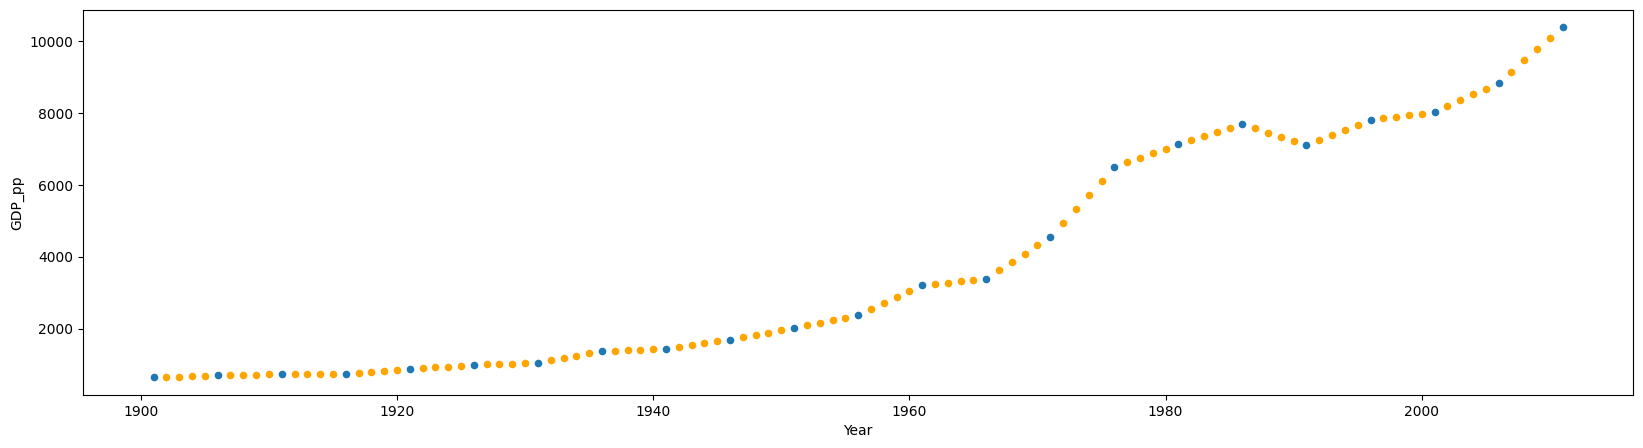

In [20]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(20, 5))

country = 'Brazil'
gdp[(gdp['kind'] == 'real') & (gdp['Country'] == country)].plot(kind='scatter', y='GDP_pp', x='Year', ax=ax)
gdp[(gdp['kind'] == 'estimated') & (gdp['Country'] == country)].plot(kind='scatter', y='GDP_pp', x='Year', ax=ax, color='orange')


#### Criando um mapa do gdp ou da obesidade no mundo ao longo dos anos

In [21]:
gdp['Year'] = gdp['Year'].astype(int)
gdp['GDP_pp'] = gdp['GDP_pp'].astype(float)

In [22]:
import plotly.express as px

df = px.data.gapminder()
dict_iso_alpha = df.set_index('country').to_dict()['iso_alpha']
dict_num = {j: i for i, j in enumerate(gdp['Country'].unique())}

gdp['iso_alpha'] = gdp['Country'].map(dict_iso_alpha)
gdp['iso_num'] = gdp['Country'].map(dict_num)

fig = px.choropleth(gdp[gdp['kind'] == 'real'].reset_index(drop=True), locations='iso_alpha', color='GDP_pp', hover_name='Country', animation_frame='Year')

fig.update_layout(height=600)
fig.show()

#### Há uma relação entre níveis de obesidade e gdp per capita?

In [23]:
obesity = pd.read_csv('data/obesity_cleaned.csv')

# Limpeza de Dados
del obesity['Unnamed: 0']
obesity['Obesity'] = obesity['Obesity (%)'].apply(lambda x: x.split(" ")[0])
obesity.loc[obesity['Obesity'] == 'No', 'Obesity'] = np.nan
obesity.dropna(inplace=True)

# Convertendo para numérico
obesity['Obesity'] = pd.to_numeric(obesity['Obesity'])
obesity['Year'] = obesity['Year'].apply(lambda x: int(x))

obesity.set_index('Year', inplace=True)

In [24]:
obesity.head(5)

,Country,Obesity (%),Sex,Obesity
Year,,,,
1975,Afghanistan,0.5 [0.2-1.1],Both sexes,0.5
1975,Afghanistan,0.2 [0.0-0.6],Male,0.2
1975,Afghanistan,0.8 [0.2-2.0],Female,0.8
1976,Afghanistan,0.5 [0.2-1.1],Both sexes,0.5
1976,Afghanistan,0.2 [0.0-0.7],Male,0.2


In [25]:
obesity['country-year'] = obesity['Country'] + '-' + obesity.reset_index()['Year'].apply(lambda x: str(int(x))).values
dict_obesity_year = obesity.set_index('country-year').to_dict()['Obesity']

In [26]:
gdp['country-year'] = gdp['Country'] + '-' + gdp['Year'].apply(lambda x: str(int(x))).values
gdp['Obesity'] = gdp['country-year'].map(dict_obesity_year)

In [27]:
gdp.head(5)

,Country,Region,Year,GDP_pp,gdp_year,next_year,kind,iso_alpha,iso_num,country-year,Obesity
Year,,,,,,,,,,,
1901,Afghanistan,"Middle East, North Africa, and Greater Arabia",1901,613.99,2.01,1906.0,real,AFG,0,Afghanistan-1901,NaN
1902,Afghanistan,"Middle East, North Africa, and Greater Arabia",1902,616.00,2.01,1906.0,estimated,AFG,0,Afghanistan-1902,NaN
1903,Afghanistan,"Middle East, North Africa, and Greater Arabia",1903,618.01,2.01,1906.0,estimated,AFG,0,Afghanistan-1903,NaN
1904,Afghanistan,"Middle East, North Africa, and Greater Arabia",1904,620.02,2.01,1906.0,estimated,AFG,0,Afghanistan-1904,NaN
1905,Afghanistan,"Middle East, North Africa, and Greater Arabia",1905,622.03,2.01,1906.0,estimated,AFG,0,Afghanistan-1905,NaN


In [28]:
gdp_clean = gdp.dropna()
gdp_clean

,Country,Region,Year,GDP_pp,gdp_year,next_year,kind,iso_alpha,iso_num,country-year,Obesity
Year,,,,,,,,,,,
1975,Afghanistan,"Middle East, North Africa, and Greater Arabia",1975,847.692,18.498,1976.0,estimated,AFG,0,Afghanistan-1975,0.8
1976,Afghanistan,"Middle East, North Africa, and Greater Arabia",1976,866.190,6.134,1981.0,real,AFG,0,Afghanistan-1976,0.8
1977,Afghanistan,"Middle East, North Africa, and Greater Arabia",1977,872.324,6.134,1981.0,estimated,AFG,0,Afghanistan-1977,0.9
1978,Afghanistan,"Middle East, North Africa, and Greater Arabia",1978,878.458,6.134,1981.0,estimated,AFG,0,Afghanistan-1978,0.9
1979,Afghanistan,"Middle East, North Africa, and Greater Arabia",1979,884.592,6.134,1981.0,estimated,AFG,0,Afghanistan-1979,1.0
...,...,...,...,...,...,...,...,...,...,...,...
2006,Zimbabwe,Sub-Saharan Africa,2006,520.170,1.232,2011.0,real,ZWE,192,Zimbabwe-2006,20.9
2007,Zimbabwe,Sub-Saharan Africa,2007,521.402,1.232,2011.0,estimated,ZWE,192,Zimbabwe-2007,21.3
2008,Zimbabwe,Sub-Saharan Africa,2008,522.634,1.232,2011.0,estimated,ZWE,192,Zimbabwe-2008,21.7


In [29]:
gdp_clean.reset_index(drop=True).groupby('Year')[['Obesity', 'GDP_pp']].mean().corr()

,Obesity,GDP_pp
Obesity,1.000000,0.969378
GDP_pp,0.969378,1.000000


## Parte 2

### Comparando PIBs e Obesidade

In [30]:
gdp.head()

,Country,Region,Year,GDP_pp,gdp_year,next_year,kind,iso_alpha,iso_num,country-year,Obesity
Year,,,,,,,,,,,
1901,Afghanistan,"Middle East, North Africa, and Greater Arabia",1901,613.99,2.01,1906.0,real,AFG,0,Afghanistan-1901,NaN
1902,Afghanistan,"Middle East, North Africa, and Greater Arabia",1902,616.00,2.01,1906.0,estimated,AFG,0,Afghanistan-1902,NaN
1903,Afghanistan,"Middle East, North Africa, and Greater Arabia",1903,618.01,2.01,1906.0,estimated,AFG,0,Afghanistan-1903,NaN
1904,Afghanistan,"Middle East, North Africa, and Greater Arabia",1904,620.02,2.01,1906.0,estimated,AFG,0,Afghanistan-1904,NaN
1905,Afghanistan,"Middle East, North Africa, and Greater Arabia",1905,622.03,2.01,1906.0,estimated,AFG,0,Afghanistan-1905,NaN


In [31]:
obesity.reset_index(inplace=True)
obesity.head()

,Year,Country,Obesity (%),Sex,Obesity,country-year
0,1975,Afghanistan,0.5 [0.2-1.1],Both sexes,0.5,Afghanistan-1975
1,1975,Afghanistan,0.2 [0.0-0.6],Male,0.2,Afghanistan-1975
2,1975,Afghanistan,0.8 [0.2-2.0],Female,0.8,Afghanistan-1975
3,1976,Afghanistan,0.5 [0.2-1.1],Both sexes,0.5,Afghanistan-1976
4,1976,Afghanistan,0.2 [0.0-0.7],Male,0.2,Afghanistan-1976


In [32]:
# Essa função irá pegar o GDP Per Capita de um país específico em um ano em particular
def get_gdp(country, year):
    gdp_value = gdp[(gdp['Country'] == country) &
                    (gdp['Year'] == year)]['GDP_pp']

    if not gdp_value.empty:
        return gdp_value.values[0]
    else:
        return 'Data not available'

""" # Essa função irá pegar a taxa de obesidade de um país específico em um ano em particular

def get_obesity_rate(country, year):
    obesity_value = obesity[([obesity['Country'] == country]) & (
        obesity['Year'] == year) & (obesity['Sex'] == 'Both sexes')]['Obesity (%)']

    if not obesity_value.empty:
        return float(obesity_value.values[0].split()[0])
    else:
        return 'Data not available' """

" # Essa função irá pegar a taxa de obesidade de um país específico em um ano em particular\n\ndef get_obesity_rate(country, year):\n    obesity_value = obesity[([obesity['Country'] == country]) & (\n        obesity['Year'] == year) & (obesity['Sex'] == 'Both sexes')]['Obesity (%)']\n\n    if not obesity_value.empty:\n        return float(obesity_value.values[0].split()[0])\n    else:\n        return 'Data not available' "

In [33]:
""" # Coletando países para analisar
countries = list()

for i in range(3):
    print('Please provide the names of three countries so that we can continue with the analysis.')
    country = input(f'Enter the name of country number {i+1}: ')

    if not country:
        break

    countries.append(country)

# Coletando os anos para análise
years = list()

for i in len(countries):
    print('Now enter the years you would like to analyze.')
    year = int(input(f'Year {i+1}: '))

    if not year:
        break

    years.append(year) """

" # Coletando países para analisar\ncountries = list()\n\nfor i in range(3):\n    print('Please provide the names of three countries so that we can continue with the analysis.')\n    country = input(f'Enter the name of country number {i+1}: ')\n\n    if not country:\n        break\n\n    countries.append(country)\n\n# Coletando os anos para análise\nyears = list()\n\nfor i in len(countries):\n    print('Now enter the years you would like to analyze.')\n    year = int(input(f'Year {i+1}: '))\n\n    if not year:\n        break\n\n    years.append(year) "

In [34]:
# Lista de países
countries = ['United States', 'China', 'Brazil']

# Anos
years = [1901, 1911, 1921]

# Inicializando as listas para armazenar os resultados
gdp_results = list()
""" obesity_results = list() """

' obesity_results = list() '

In [35]:
# Aplicando as funções em cada um dos valores e armazenando em uma lista
for country in countries:
    for year in years:
        gdp_result = get_gdp(country, year)
        """ obesity_result = get_obesity_rate(country, year) """
        
        gdp_results.append((country, year, gdp_result))
        """ obesity_results.append((country, year, obesity_result)) """

In [39]:
# Analisando os resultados
for result in gdp_results:
    country, year, gdp_pp = result
    
    if gdp_pp != 'Data not available':
        
        if gdp_pp > 1000000:
            status = 'high GDP'
        elif gdp_pp < 500000:
            status = 'moderate GDP'
        else:
            status = 'low GDP'
    else:
        status = 'no data'

    print('--------------------------------------------------------')
    print(f'In {year}, {country} had {status}.')

--------------------------------------------------------
In 1901, United States had moderate GDP.
--------------------------------------------------------
In 1911, United States had moderate GDP.
--------------------------------------------------------
In 1921, United States had moderate GDP.
--------------------------------------------------------
In 1901, China had moderate GDP.
--------------------------------------------------------
In 1911, China had moderate GDP.
--------------------------------------------------------
In 1921, China had moderate GDP.
--------------------------------------------------------
In 1901, Brazil had moderate GDP.
--------------------------------------------------------
In 1911, Brazil had moderate GDP.
--------------------------------------------------------
In 1921, Brazil had moderate GDP.


In [49]:
# Definindo a média do PIB de um país
def average_gdp(country):
    country_data = gdp[gdp['Country'] == country]
    
    if not country_data.empty:
        return country_data['GDP_pp'].mean()
    else:
        return 'Data not available'

# Usando a função para um país
avg_gdp = average_gdp('United States')
print(f'The average GDP per capita of the United State over the available years is ${avg_gdp:.2f}')

The average GDP per capita of the United State over the available years is $20439.41
